In [4]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('college_student_management_data.csv')

In [8]:
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [9]:
df.shape

(1545, 15)

In [10]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [13]:
df['major'].value_counts()

major
Arts                404
Computer Science    389
Engineering         384
Business            368
Name: count, dtype: int64

In [14]:
df['risk_level'].value_counts()

risk_level
High      805
Medium    456
Low       284
Name: count, dtype: int64

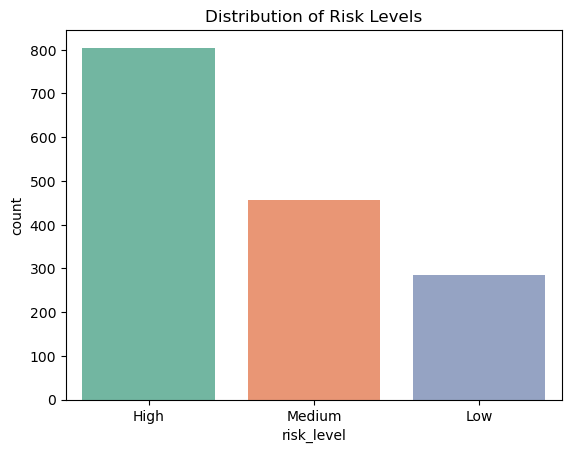

In [15]:
sns.countplot(data=df, x='risk_level', palette='Set2')
plt.title('Distribution of Risk Levels')
plt.show()

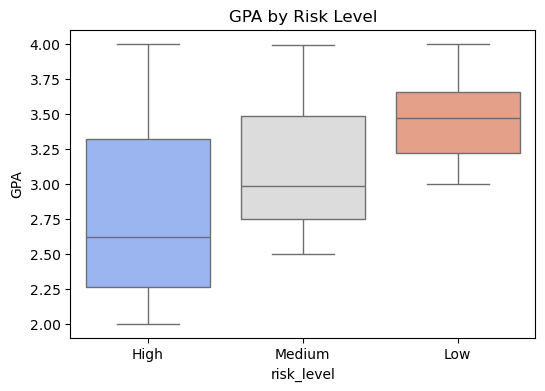

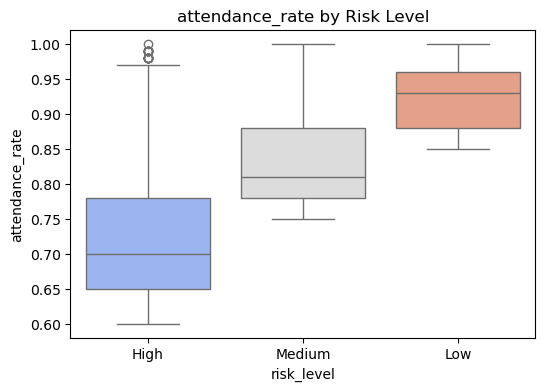

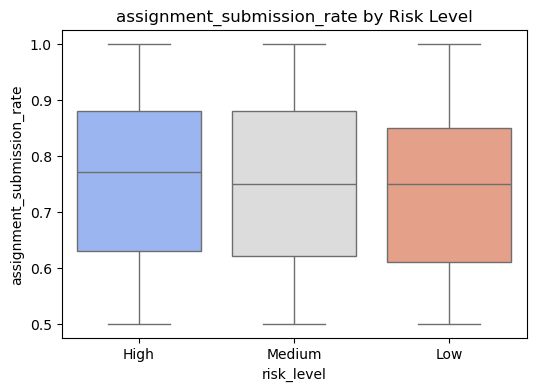

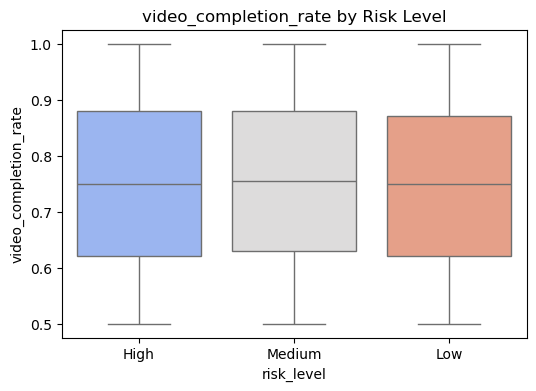

In [16]:
features = ['GPA', 'attendance_rate', 'assignment_submission_rate', 'video_completion_rate']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='risk_level', y=col, palette='coolwarm')
    plt.title(f'{col} by Risk Level')
    plt.show()

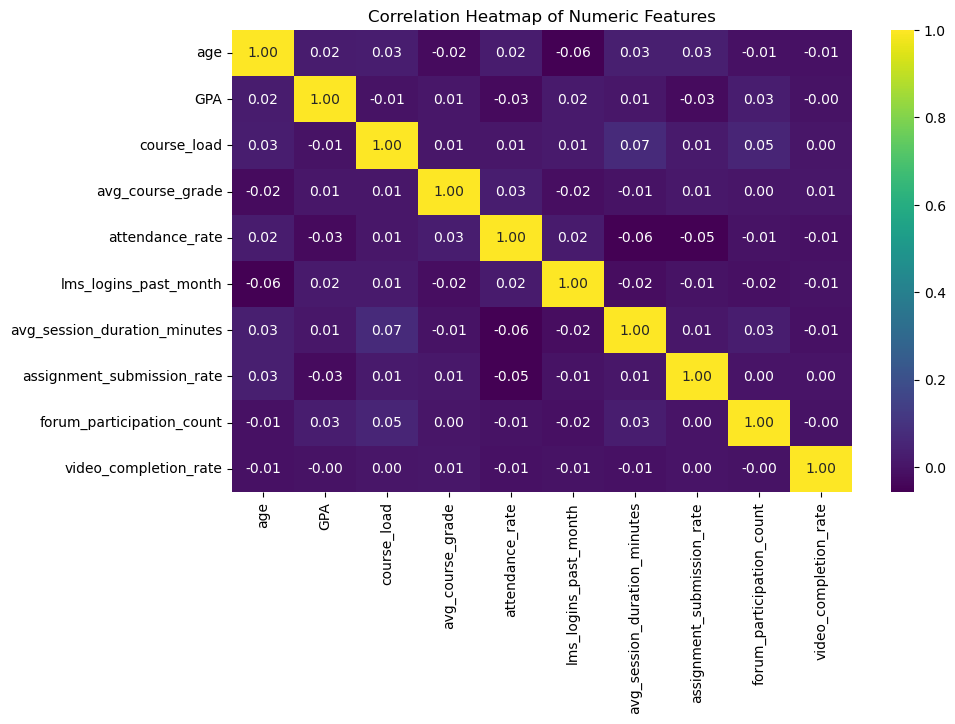

In [17]:
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [18]:
# Drop 'student_id' (non-numeric identifier)
df = df.drop('student_id', axis=1)

In [19]:
df.head()

,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [20]:
columns_to_encode = ['gender','major','enrollment_status']
df_dummies = pd.get_dummies(df[columns_to_encode])
df_dummies

,gender_Female,gender_Male,gender_Other,major_Arts,major_Business,major_Computer Science,major_Engineering,enrollment_status_Active,enrollment_status_Graduated,enrollment_status_Leave
0,False,False,True,False,False,True,False,False,True,False
1,False,True,False,True,False,False,False,False,False,True
2,False,True,False,False,False,True,False,False,True,False
3,False,True,False,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1540,False,True,False,False,True,False,False,False,False,True
1541,False,False,True,False,True,False,False,False,True,False
1542,False,True,False,False,False,True,False,False,False,True
1543,False,True,False,True,False,False,False,False,True,False


In [21]:
# concatenating the dummies DataFrame with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [22]:
df

,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,...,gender_Female,gender_Male,gender_Other,major_Arts,major_Business,major_Computer Science,major_Engineering,enrollment_status_Active,enrollment_status_Graduated,enrollment_status_Leave
0,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,...,False,False,True,False,False,True,False,False,True,False
1,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,...,False,True,False,True,False,False,False,False,False,True
2,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,...,False,True,False,False,False,True,False,False,True,False
3,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,...,False,True,False,True,False,False,False,False,True,False
4,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,24,Male,Business,3.61,6,70.5,0.77,Leave,26,64,...,False,True,False,False,True,False,False,False,False,True
1541,24,Other,Business,2.80,4,77.4,0.96,Graduated,12,19,...,False,False,True,False,True,False,False,False,True,False
1542,21,Male,Computer Science,3.61,5,66.3,0.99,Leave,1,89,...,False,True,False,False,False,True,False,False,False,True
1543,22,Male,Arts,3.18,4,97.9,0.85,Graduated,20,15,...,False,True,False,True,False,False,False,False,True,False


In [23]:
df  = df.drop(columns=['gender','major','enrollment_status'],axis=1)

In [24]:
df.columns

Index(['age', 'GPA', 'course_load', 'avg_course_grade', 'attendance_rate',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate', 'risk_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'major_Arts', 'major_Business',
       'major_Computer Science', 'major_Engineering',
       'enrollment_status_Active', 'enrollment_status_Graduated',
       'enrollment_status_Leave'],
      dtype='object')

In [25]:
# Label encode categorical features
le = LabelEncoder()
df['risk_level'] = le.fit_transform(df['risk_level'])

In [26]:
# Define features (X) and target (y)
X = df.drop('risk_level', axis=1)
y = df['risk_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [27]:
#Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.93      0.90       182
         Low       0.80      0.67      0.73        49
      Medium       0.60      0.56      0.58        78

    accuracy                           0.80       309
   macro avg       0.76      0.72      0.74       309
weighted avg       0.79      0.80      0.79       309


 Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       182
         Low       1.00      1.00      1.00        49
      Medium       1.00      1.00      1.00        78

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309


 Random Forest Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       182
      

In [28]:
# Evaluate Accuracies
accuracies_in_percent = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracies_in_percent[name] = round(accuracy * 100, 2)

# Display results
print("Model Accuracies (%):")
for name, acc_per in accuracies_in_percent.items():
    print(f"{name}: {acc_per}%")

Model Accuracies (%):
Logistic Regression: 79.61%
Decision Tree: 100.0%
Random Forest: 100.0%
Support Vector Machine: 58.9%
K-Nearest Neighbors: 47.57%
Naive Bayes: 87.7%
Gradient Boosting: 100.0%
